In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

from sklearn.cluster import KMeans

from scipy.cluster import hierarchy

from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score

## Carregando Bases de Dados

In [16]:
enem_total = pd.read_csv('../src/enem_total.csv')

enem = pd.read_csv('../src/enem_total_quant.csv')

enem_pad = pd.read_csv('../src/enem_total_quant_pad.csv')

enem_pad.set_index('NU_INSCRICAO', drop=True, inplace=True)

enem.head()

,NU_INSCRICAO,NU_IDADE,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005,NU_NOTA_MEDIA
0,190001237802,22.0,513.6,575.5,570.7,677.0,160.0,120.0,170.0,170.0,200.0,860.0,3.0,584.200
1,190001421548,22.0,484.6,488.4,507.2,594.7,140.0,120.0,120.0,160.0,60.0,600.0,3.0,518.725
2,190001592266,17.0,543.9,548.1,502.5,480.7,120.0,90.0,120.0,120.0,0.0,400.0,5.0,518.800
3,190001475147,19.0,518.2,351.7,417.6,459.0,120.0,120.0,120.0,120.0,20.0,500.0,4.0,436.625
4,190001867756,23.0,373.8,393.6,451.0,484.7,120.0,90.0,90.0,100.0,0.0,300.0,3.0,425.775


In [17]:
enem_pad.head()

,NU_IDADE,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005,NU_NOTA_MEDIA
NU_INSCRICAO,,,,,,,,,,,,,
190001237802,0.025038,0.430864,0.743696,0.715873,1.475362,1.531819,-0.455473,1.905869,1.678562,1.765516,1.638358,-0.610414,1.079994
190001421548,0.025038,0.032918,-0.452761,-0.506077,0.694142,0.583889,-0.455473,-0.229759,1.276303,-0.740683,-0.091095,-0.610414,0.063155
190001592266,-0.960845,0.846649,0.367314,-0.596521,-0.387986,-0.364042,-1.735008,-0.229759,-0.332733,-1.814768,-1.421443,0.854579,0.064319
190001475147,-0.566491,0.493987,-2.330553,-2.230278,-0.593970,-0.364042,-0.455473,-0.229759,-0.332733,-1.456740,-0.756269,0.122083,-1.211875
190001867756,0.222215,-1.487511,-1.754990,-1.587552,-0.350016,-0.364042,-1.735008,-1.511136,-1.137250,-1.814768,-2.086618,-0.610414,-1.380377


## Cluster KMEANS com método Silhouette e Elbow

In [18]:
inertias = []
valores_silhueta = []

for k in np.arange(2,10):
  kmeans = KMeans(n_clusters=k)
  labels = kmeans.fit_predict(enem_pad)
  inertias.append(kmeans.inertia_)
  media_silhueta = silhouette_score(enem_pad, labels)
  valores_silhueta.append(media_silhueta)

In [19]:
valores_silhueta

[0.2855207131247267,
 0.18895169167564504,
 0.1909669822385866,
 0.1638189442033202,
 0.16525008994567067,
 0.15780709654843203,
 0.1438279700749339,
 0.12015695998630427]

Text(0, 0.5, 'Inertia')

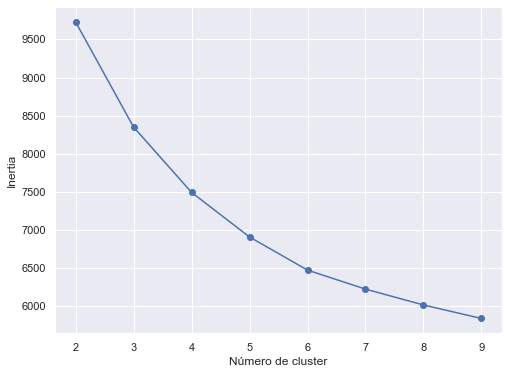

In [20]:
#Plotando o gráfico do Elbow Method
plt.figure(figsize=(8,6))
plt.plot(np.arange(2,10), inertias, '-o')
plt.xlabel('Número de cluster')
plt.ylabel('Inertia')

Text(0, 0.5, 'Silhueta')

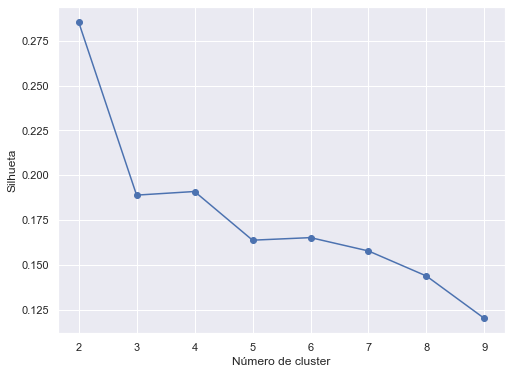

In [21]:
#Plotando o gráfico da Silhueta
plt.figure(figsize=(8,6))
plt.plot(np.arange(2,10), valores_silhueta, '-o')
plt.xlabel('Número de cluster')
plt.ylabel('Silhueta')

In [22]:
n_cluster = 5
kmeans = KMeans(n_clusters = n_cluster)
predict = kmeans.fit_predict(enem_pad)
enem['group'] = predict
enem_total['group'] = predict

In [23]:
centroids = kmeans.cluster_centers_

max = len(centroids[0])
for i in range(max):
    print(enem.columns.values[i],": {:.4f}".format(centroids[:, i].var()))

NU_INSCRICAO : 0.1109
NU_IDADE : 0.6010
NU_NOTA_CN : 0.5944
NU_NOTA_CH : 0.6026
NU_NOTA_LC : 0.6960
NU_NOTA_MT : 0.6967
NU_NOTA_COMP1 : 0.6532
NU_NOTA_COMP2 : 0.8295
NU_NOTA_COMP3 : 0.7949
NU_NOTA_COMP4 : 0.6907
NU_NOTA_COMP5 : 0.9542
NU_NOTA_REDACAO : 0.0013
Q005 : 0.8612


## Extraindo Informações dos Grupos

### Baseado nas Notas - var quant, consideradas no Cluster

In [24]:
description = enem.groupby("group")["NU_IDADE", "NU_NOTA_CH", "NU_NOTA_CN", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP1", "NU_NOTA_COMP2", "NU_NOTA_COMP3", "NU_NOTA_COMP4", "NU_NOTA_COMP5", "NU_NOTA_REDACAO", "Q005"]
n_clients = description.size()
description = description.mean()
description['group'] = n_clients
print(description)

        NU_IDADE  NU_NOTA_CH  NU_NOTA_CN  NU_NOTA_LC  NU_NOTA_MT  \
group                                                              
0      21.418301  479.735948  432.566667  509.802369  455.192157   
1      19.737179  612.662660  581.594872  597.626282  685.304487   
2      19.994444  526.822222  476.364444  537.370278  506.326667   
3      23.102941  563.847426  522.908456  562.741176  571.658456   
4      24.036364  457.515455  435.205455  481.664659  448.355455   

       NU_NOTA_COMP1  NU_NOTA_COMP2  NU_NOTA_COMP3  NU_NOTA_COMP4  \
group                                                               
0         122.026144     124.248366     118.660131     120.915033   
1         155.512821     160.576923     159.487179     162.500000   
2         145.111111     151.055556     147.055556     153.000000   
3         124.044118     124.669118     119.191176     120.992647   
4         106.045455     109.181818     100.454545     103.000000   

       NU_NOTA_COMP5  NU_NOTA_REDACAO  

C:\Users\DESKTOP\AppData\Local\Temp/ipykernel_11756/194860749.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  description = enem.groupby("group")["NU_IDADE", "NU_NOTA_CH", "NU_NOTA_CN", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP1", "NU_NOTA_COMP2", "NU_NOTA_COMP3", "NU_NOTA_COMP4", "NU_NOTA_COMP5", "NU_NOTA_REDACAO", "Q005"]


#### O que podemos tirar das médias dos grupos

 1. Quanto menor a idade maior a nota nas provas - Grupo 4
 2. Quanto maior a idade menor a nota nas provas - Grupo 3
 3. A segunda menor média de pessoas que residem na residência estão dentro desse grupo - Grupo 4
 4. A menor quantidade de pessoas está dentro desse grupo - Grupo 4
 5. O Grupo 0 está bem próximo para baixo do Grupo 4, tirando a quantidade de pessoas na residência que é maior e a quantidade total naquele grupo (o que talvez tenha ajudado a diminuir a média geral)

 Tem uma lógica sequencia de grupos, em ordem decrescente:
 
 - 19 anos * GRUPO 4: maiores médias de notas, menores médias de idades, menor média de quantidade de pessoas no grupo e de pessoas morando na residência
 - 23 anos * GRUPO 2: Destoa por ter a idade média acima do próximo grupo da lista, e notas médias um pouco menores que o grupo anterior
 - 20 anos * GRUPO 0: Maiores notas de comp e de redação que o anterior, menores notas de provas que o anterior.
 - 21 anos * GRUPO 1: Maior média de quantidade de pessoas no grupo e maior média de quantidade de pessias morando na residência.
 - 23 anos * GRUPO 0:



### Baseada na Raça

In [101]:
description = enem_total.groupby(["group", 'TP_COR_RACA'])['NU_NOTA_MEDIA'].mean()

enem_raca = pd.DataFrame(description)

enem_raca


NU_NOTA_MEDIA
group TP_COR_RACA               
0     0               487.546429
      1               476.485526
      2               454.936849
      3               469.494798
      4               478.418750
      5               455.754167
1     0               618.175000
      1               624.138315
      2               611.841250
      3               616.742742
      4               607.700000
2     1               515.317453
      2               509.623333
      3               509.867827
      4               514.949219
      5               521.275000
3     0               547.383333
      1               560.457598
      2               544.630882
      3               554.523810
      4               545.304167
      5               570.475000
4     0               464.250000
      1               459.076154
      2               454.622857
      3               454.269353
      4               471.025000
      5               417.487500

### Usando GROUP_BY por RAÇA

In [77]:
nota = enem_total.groupby('TP_COR_RACA')["NU_NOTA_MEDIA"].mean()

enem_group = pd.DataFrame(nota)

* Administração: 570 a 771
* Medicina: 769 a 901

In [78]:
enem_group = enem_group.sort_values(by='NU_NOTA_MEDIA', ascending=False)

In [79]:
enem_group.reset_index(level=0, inplace=True)

In [80]:
enem_group

,TP_COR_RACA,NU_NOTA_MEDIA
0,1,530.402449
1,0,526.696429
2,4,512.860880
3,3,508.805422
4,2,501.746969
5,5,466.125000


Legenda:
{ 0: Não declarado,
1: Branca,
2: Preta,
3: Parda,
4: Amarela,
5: Indígena } 

In [81]:
old = list(range(0,6))

new = ['Não declarado', 'Branca', 'Preta', 'Parda', 'Amarela', 'Indígena']

In [82]:
enem_group['TP_COR_RACA'] = enem_group['TP_COR_RACA'].replace(old, new)

In [83]:
enem_group

,TP_COR_RACA,NU_NOTA_MEDIA
0,Branca,530.402449
1,Não declarado,526.696429
2,Amarela,512.860880
3,Parda,508.805422
4,Preta,501.746969
5,Indígena,466.125000


Em média a os autodeclarados Pretos, Pardos e Indígenas estão com as menores médias de notas do ENEM.